# Transfer Function analysis of Inverted Pendulum
__Author:__ Eduardo Fernandes Montesuma


__Date:__ 28/03/18

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from control import *
from scipy.constants import g

%matplotlib inline

## Open-loop analysis
### Impulse response

In [2]:
"""
    Problem variables
"""
M = 4.8        # Cart mass
m = 0.356      # Pendulum mass
l = 0.56       # Pole length
dmf = 0.035    # Joint friction
fc = 4.9       # Cart friction

s = tf([1,0],[1]) # Frequency variable

In [10]:
Tx = (m*(l**2)*(s**2) - dmf*s - m*g*l)/ \
    (M*m*(l**2)*(s**4) - ((M+m)*dmf + m*l*fc)*(s**3) - \
    (dmf * fc + (M+m)*m*g*l)*(s**2) - m*g*l*fc*s)
    
Tt = (m*l*s)/(M*m*(l**2)*(s**3)\
           - ((M+m)*dmf + m*l*fc)*(s**2) - \
          (dmf * fc + (M+m)*m*g*l)*s - m*g*l*fc)
print(Tx)
print(Tt)


        0.1116 s^2 - 0.035 s - 1.955
-------------------------------------------
0.5359 s^4 - 1.157 s^3 - 10.25 s^2 - 9.58 s


                0.1994 s
---------------------------------------
0.5359 s^3 - 1.157 s^2 - 10.25 s - 9.58



In [11]:
poles_x = Tx.pole()
zeros_x = Tx.zero()

poles_theta = Tt.pole()
zeros_theta = Tt.zero()

print("x Transfer function")
print("Poles: {}".format(poles_x))
print("Zeros: {}".format(zeros_x))

print("Theta Transfer function")
print("Poles: {}".format(poles_theta))
print("Zeros: {}".format(zeros_theta))

x Transfer function
Poles: [ 5.90912381 -2.57424506 -1.17520739  0.        ]
Zeros: [ 4.34440561 -4.0309024 ]
Theta Transfer function
Poles: [ 5.90912381 -2.57424506 -1.17520739]
Zeros: [0.]


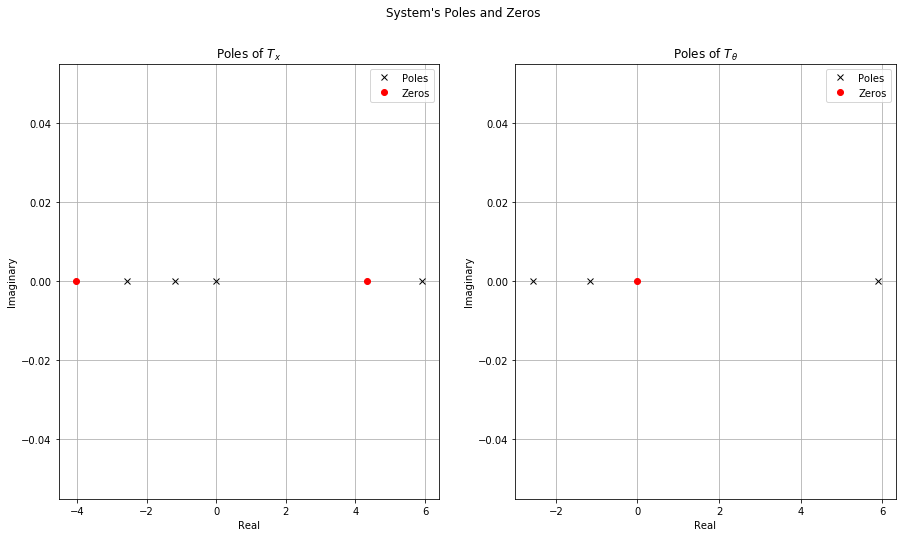

In [13]:
fig, ax = plt.subplots(1,2,figsize=(15,8))

plt.suptitle('System\'s Poles and Zeros')

ax[0].set_title(r'Poles of $T_x$')
ax[0].plot(poles_x,[0,0,0,0], 'kx', label = 'Poles')
ax[0].plot(zeros_x,[0,0], 'ro', label = 'Zeros')
ax[0].set_ylabel('Imaginary')
ax[0].set_xlabel('Real')
ax[0].legend()
ax[0].grid()

ax[1].set_title(r'Poles of $T_\theta$')
ax[1].plot(poles_theta,[0,0,0], 'kx', label = 'Poles')
ax[1].plot(zeros_theta,[0], 'ro', label = 'Zeros')
ax[1].set_ylabel('Imaginary')
ax[1].set_xlabel('Real')
ax[1].legend()
ax[1].grid()

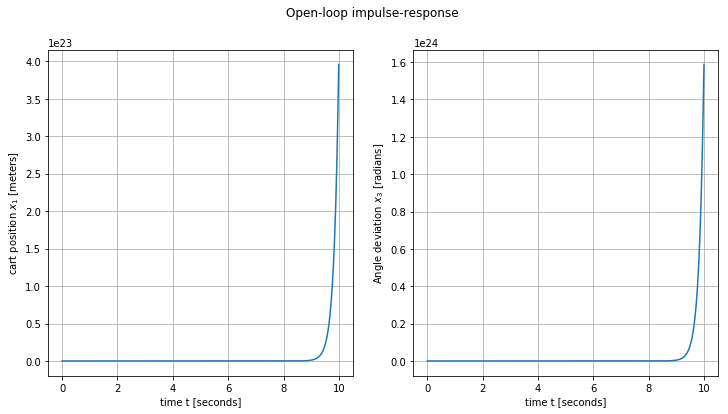

In [15]:
t = np.arange(0,10,0.01)
_, ytheta = impulse_response(Tt, T = t, 
                                  X0 = [0, 0, 0])
_, yx   = impulse_response(Tx, T = t, 
                                X0 = [0, 0, 0, 0])

(fig, ax) = plt.subplots(1,2,figsize = (12,6))

plt.suptitle('Open-loop impulse-response')

ax[0].plot(t, yx)
ax[0].set_ylabel(r'cart position $x_{1}$ [meters]')
ax[0].set_xlabel('time t [seconds]')
ax[0].grid()

ax[1].plot(t, ytheta)
ax[1].set_ylabel(r'Angle deviation $x_{3}$ [radians]')
ax[1].set_xlabel('time t [seconds]')
ax[1].grid()
plt.show()